# Compliance Plot

## Load Libraries

In [1]:
import os, sys
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from obspy import UTCDateTime

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [3]:
# ## ---------------------------------------

config = {}

## specify paths
config['path_to_figs'] = data_path+f"LNM2/figures/scatter/"

config['path_to_data'] = data_path+f"LNM2/data/"


## Methods

In [4]:
compl_FUR = pd.read_pickle(config['path_to_data']+"compliance_FUR.pkl")

compl_ROMY = pd.read_pickle(config['path_to_data']+"compliance_ROMY.pkl")


## Compliance Plot

In [5]:
def __makeplot():

    Nrow, Ncol = 1, 1

    font = 12

    scaling = 9.81 / (2*np.pi*compl_FUR['fc'])

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(10, 5))

    ax.plot(compl_FUR['fc'], compl_FUR['Z'], label="FUR.Z", marker=".")
    ax.plot(compl_FUR['fc'], compl_FUR['N'], label="FUR.N", marker=".")
    ax.plot(compl_FUR['fc'], compl_FUR['E'], label="FUR.E", marker=".")


    ax.plot(compl_ROMY['fc'], compl_ROMY['Z']*scaling, label="ROMY.Z", ls="-", marker="x")
    ax.plot(compl_ROMY['fc'], compl_ROMY['N']*scaling, label="ROMY.N", ls="-", marker="x")
    ax.plot(compl_ROMY['fc'], compl_ROMY['E']*scaling, label="ROMY.E", ls="-", marker="x")


    ax.grid(axis="both", which="both", ls=":", zorder=0)
    ax.legend(loc=4, ncol=2)

    ax.set_xscale("log")
    ax.set_yscale("log")

    ax.set_xlim(1e-3, 2e-1)

    ax.set_xlabel("Frequency (Hz)", fontsize=font)
    ax.set_ylabel("Compliance (nm /s$^2$ /hPa)", fontsize=font)

    plt.show();
    return fig

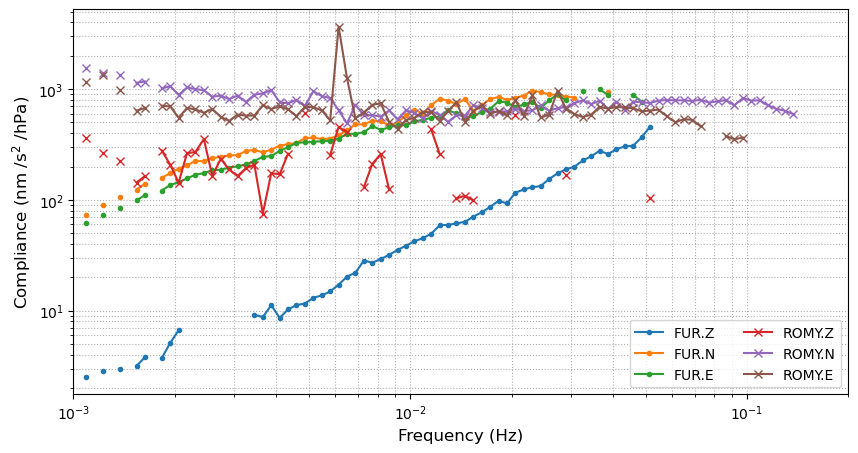

In [6]:
fig = __makeplot();

fig.savefig(config['path_to_figs']+f"compliance.png", format="png", dpi=150, bbox_inches='tight')


In [7]:
os.system("""spd-say "Finished" """)

0

In [9]:
baro_lnm = pd.read_csv(data_path+f"LNM2/data/"+"baro_nlnm_nhnm.csv")

baro_lnm['nlnm_baro'] = 10**(baro_lnm['nlnm_baro_db']/10)
baro_lnm['nhnm_baro'] = 10**(baro_lnm['nhnm_baro_db']/10)

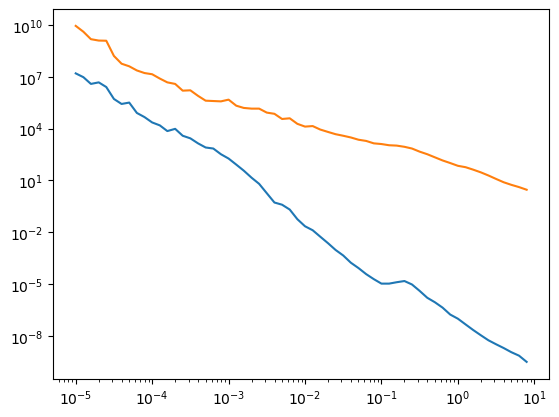

In [13]:
plt.loglog(baro_lnm['frequency'], baro_lnm['nlnm_baro'])
plt.loglog(baro_lnm['frequency'], baro_lnm['nhnm_baro'])

In [18]:
compl_ROMY['nlnm_baro'] = np.interp(compl_ROMY['fc'], baro_lnm['frequency'], baro_lnm['nlnm_baro'])
compl_ROMY['nhnm_baro'] = np.interp(compl_ROMY['fc'], baro_lnm['frequency'], baro_lnm['nhnm_baro'])

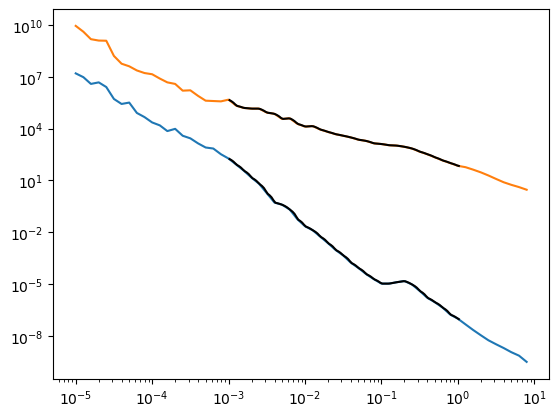

In [20]:
plt.loglog(baro_lnm['frequency'], baro_lnm['nlnm_baro'])
plt.loglog(baro_lnm['frequency'], baro_lnm['nhnm_baro'])

plt.loglog(compl_ROMY['fc'], compl_ROMY['nlnm_baro'], "k")
plt.loglog(compl_ROMY['fc'], compl_ROMY['nhnm_baro'], "k")


In [25]:
compl_ROMY['baro_rlnm_Z'] = compl_ROMY['N'] * 100 * compl_ROMY['nlnm_baro']
compl_ROMY['baro_rlnm_N'] = compl_ROMY['Z'] * 100 * compl_ROMY['nlnm_baro']
compl_ROMY['baro_rlnm_E'] = compl_ROMY['E'] * 100 * compl_ROMY['nlnm_baro']

compl_ROMY['baro_rhnm_Z'] = compl_ROMY['N'] * 100 * compl_ROMY['nhnm_baro']
compl_ROMY['baro_rhnm_N'] = compl_ROMY['Z'] * 100 * compl_ROMY['nhnm_baro']
compl_ROMY['baro_rhnm_E'] = compl_ROMY['E'] * 100 * compl_ROMY['nhnm_baro']

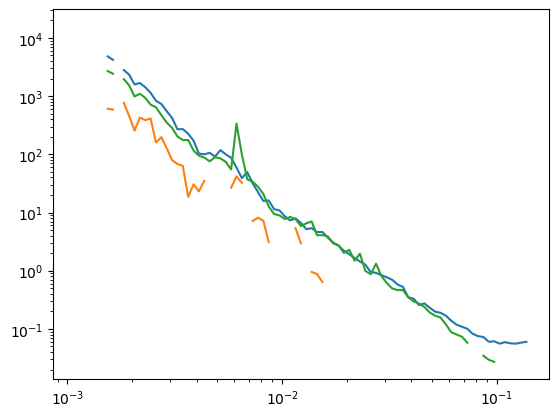

In [26]:
plt.loglog(compl_ROMY['fc'], compl_ROMY['baro_rlnm_Z'])
plt.loglog(compl_ROMY['fc'], compl_ROMY['baro_rlnm_N'])
plt.loglog(compl_ROMY['fc'], compl_ROMY['baro_rlnm_E'])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


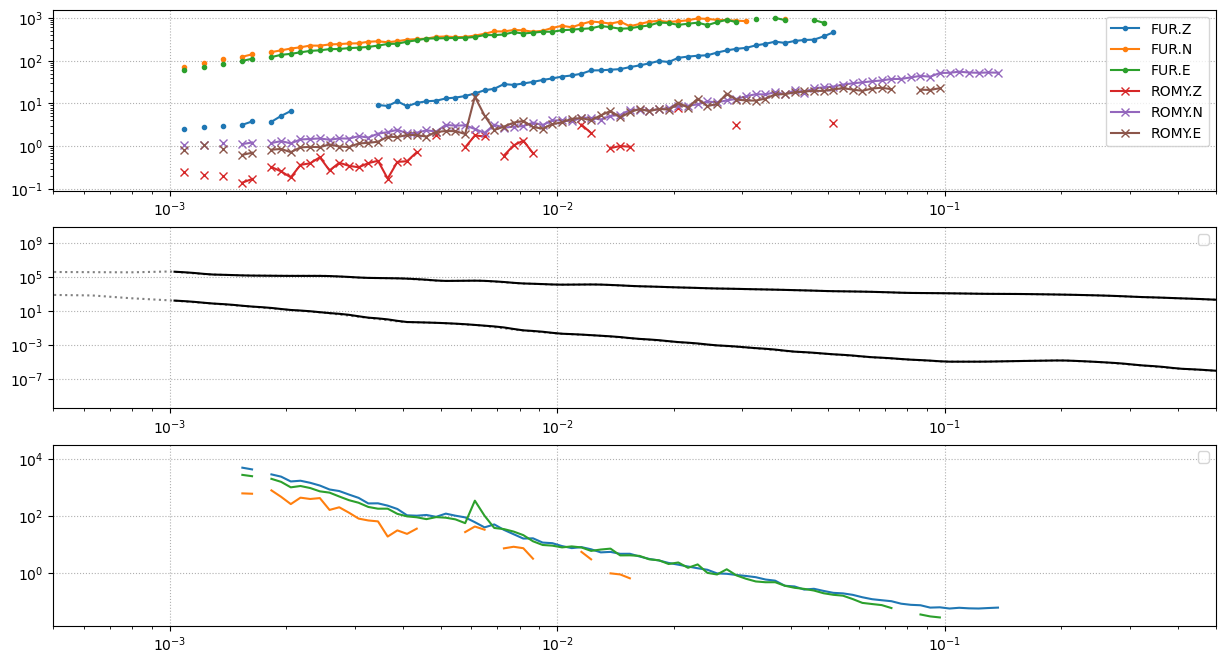

In [36]:
def __makeplot():

    Nrow, Ncol = 3, 1

    font = 12

    scaling = 1

    fig, ax = plt.subplots(Nrow, Ncol, figsize=(15, 8))

    ax[0].plot(compl_FUR['fc'], compl_FUR['Z'], label="FUR.Z", marker=".")
    ax[0].plot(compl_FUR['fc'], compl_FUR['N'], label="FUR.N", marker=".")
    ax[0].plot(compl_FUR['fc'], compl_FUR['E'], label="FUR.E", marker=".")


    ax[0].plot(compl_ROMY['fc'], compl_ROMY['Z']*scaling, label="ROMY.Z", ls="-", marker="x")
    ax[0].plot(compl_ROMY['fc'], compl_ROMY['N']*scaling, label="ROMY.N", ls="-", marker="x")
    ax[0].plot(compl_ROMY['fc'], compl_ROMY['E']*scaling, label="ROMY.E", ls="-", marker="x")


    ax[1].plot(baro_lnm['frequency'], baro_lnm['nlnm_baro'], color="grey", ls=":")
    ax[1].plot(baro_lnm['frequency'], baro_lnm['nhnm_baro'], color="grey", ls=":")

    ax[1].plot(compl_ROMY['fc'], compl_ROMY['nlnm_baro'], "k")
    ax[1].plot(compl_ROMY['fc'], compl_ROMY['nhnm_baro'], "k")


    ax[2].plot(compl_ROMY['fc'], compl_ROMY['baro_rlnm_Z'])
    ax[2].plot(compl_ROMY['fc'], compl_ROMY['baro_rlnm_N'])
    ax[2].plot(compl_ROMY['fc'], compl_ROMY['baro_rlnm_E'])

    for _n in range(Nrow):
        ax[_n].grid(ls=":", zorder=0)
        ax[_n].legend(loc=1)
        ax[_n].set_yscale("log")
        ax[_n].set_xscale("log")
        ax[_n].set_xlim(5e-4, 5e-1)

    plt.show();
    return fig


fig = __makeplot();